# Electric Vehicle Data Analysis Project

## Introduction

The global shift towards **sustainable transportation** has significantly increased the adoption of **electric vehicles (EVs)**. EVs are gaining popularity due to their **low emissions, cost-efficiency, and advanced technology**. However, selecting the right EV involves evaluating multiple factors, such as **price, range, battery capacity, energy consumption, and performance metrics**.

This project aims to **analyze a dataset of electric vehicles** to derive meaningful insights that can help customers and stakeholders make **data-driven decisions**. By applying **Python-based data analysis techniques**, we will explore trends, detect outliers, test hypotheses, and develop a simple recommendation system.

---

## Project Objectives

1. **Filter and group EVs** based on budget and range constraints.  
2. **Detect anomalies (outliers)** in energy consumption patterns.  
3. **Explore correlations** between battery capacity and range using visualizations.  
4. **Develop a recommendation class** to suggest top EVs based on user inputs.  
5. **Conduct hypothesis testing** to compare engine power between major manufacturers.  
6. **Summarize findings and provide actionable recommendations** for EV buyers.  

---

## Dataset Overview

The dataset contains detailed specifications of electric vehicles, including:  
- **Car full name, Make, Model**  
- **Price (PLN), Engine Power, Torque, Battery Capacity, Range (WLTP)**  
- **Physical dimensions (Length, Width, Height, Weight)**  
- **Performance metrics (Acceleration, Top speed, Energy consumption)**  

This dataset enables **comprehensive analysis** of both **technical specifications** and **consumer-relevant features**.


## Library Import and Dataset Loading

Before performing any analysis, we import the required Python libraries and load the dataset.  

### Libraries Used
- **Pandas**: For data manipulation and analysis.  
- **NumPy**: For numerical computations.  
- **Matplotlib**: For creating visualizations.  
- **SciPy**: For statistical tests and hypothesis testing (used in later tasks).  

We then read the dataset from the Excel file and display its basic structure.


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Load the dataset
file_path = "FEV-data-Excel.xlsx"   
data = pd.read_excel(file_path, sheet_name='Auta elektryczne')

# Display first few rows
display(data.head())

# Display basic information about the dataset
data.info()


,Car full name,Make,Model,Minimal price (gross) [PLN],Engine power [KM],Maximum torque [Nm],Type of brakes,Drive type,Battery capacity [kWh],Range (WLTP) [km],...,Permissable gross weight [kg],Maximum load capacity [kg],Number of seats,Number of doors,Tire size [in],Maximum speed [kph],Boot capacity (VDA) [l],Acceleration 0-100 kph [s],Maximum DC charging power [kW],mean - Energy consumption [kWh/100 km]
0,Audi e-tron 55 quattro,Audi,e-tron 55 quattro,345700,360,664,disc (front + rear),4WD,95.0,438,...,3130.0,640.0,5,5,19,200,660.0,5.7,150,24.45
1,Audi e-tron 50 quattro,Audi,e-tron 50 quattro,308400,313,540,disc (front + rear),4WD,71.0,340,...,3040.0,670.0,5,5,19,190,660.0,6.8,150,23.80
2,Audi e-tron S quattro,Audi,e-tron S quattro,414900,503,973,disc (front + rear),4WD,95.0,364,...,3130.0,565.0,5,5,20,210,660.0,4.5,150,27.55
3,Audi e-tron Sportback 50 quattro,Audi,e-tron Sportback 50 quattro,319700,313,540,disc (front + rear),4WD,71.0,346,...,3040.0,640.0,5,5,19,190,615.0,6.8,150,23.30
4,Audi e-tron Sportback 55 quattro,Audi,e-tron Sportback 55 quattro,357000,360,664,disc (front + rear),4WD,95.0,447,...,3130.0,670.0,5,5,19,200,615.0,5.7,150,23.85


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 25 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Car full name                           53 non-null     object 
 1   Make                                    53 non-null     object 
 2   Model                                   53 non-null     object 
 3   Minimal price (gross) [PLN]             53 non-null     int64  
 4   Engine power [KM]                       53 non-null     int64  
 5   Maximum torque [Nm]                     53 non-null     int64  
 6   Type of brakes                          52 non-null     object 
 7   Drive type                              53 non-null     object 
 8   Battery capacity [kWh]                  53 non-null     float64
 9   Range (WLTP) [km]                       53 non-null     int64  
 10  Wheelbase [cm]                          53 non-null     float64


## Task 1: Filter and Analyze EVs Based on Budget and Range

### Objective
A customer has a **budget of 350,000 PLN** and requires an electric vehicle (EV) with a **minimum range of 400 km**. The task involves:
1. Filtering EVs that meet these conditions.  
2. Grouping the filtered EVs by **manufacturer (Make)**.  
3. Calculating the **average battery capacity** for each manufacturer.  

---

### Steps
1. **Apply filters**: `Minimal price (gross) [PLN]` ≤ 350,000 and `Range (WLTP) [km]` ≥ 400.  
2. **Group by Make**: Summarize filtered EVs by manufacturer.  
3. **Calculate average battery capacity**: Find mean battery capacity for each manufacturer.  
4. **Visualize**: Plot average battery capacity per manufacturer for easy comparison.

---


In [17]:
# Step 1: Define criteria
budget = 350000
min_range = 400

# Step 2: Filter EVs based on budget and range
filtered_evs = data[
    (data['Minimal price (gross) [PLN]'] <= budget) &
    (data['Range (WLTP) [km]'] >= min_range)
]

# Display filtered EVs
print("Filtered EVs (Budget <= 350,000 PLN and Range >= 400 km):")
display(filtered_evs[['Car full name', 'Make', 'Minimal price (gross) [PLN]', 
                      'Range (WLTP) [km]', 'Battery capacity [kWh]']])


Filtered EVs (Budget <= 350,000 PLN and Range >= 400 km):


,Car full name,Make,Minimal price (gross) [PLN],Range (WLTP) [km],Battery capacity [kWh]
0,Audi e-tron 55 quattro,Audi,345700,438,95.0
8,BMW iX3,BMW,282900,460,80.0
15,Hyundai Kona electric 64kWh,Hyundai,178400,449,64.0
18,Kia e-Niro 64kWh,Kia,167990,455,64.0
20,Kia e-Soul 64kWh,Kia,160990,452,64.0
22,Mercedes-Benz EQC,Mercedes-Benz,334700,414,80.0
39,Tesla Model 3 Standard Range Plus,Tesla,195490,430,54.0
40,Tesla Model 3 Long Range,Tesla,235490,580,75.0
41,Tesla Model 3 Performance,Tesla,260490,567,75.0
47,Volkswagen ID.3 Pro Performance,Volkswagen,155890,425,58.0


In [18]:
# Step 3: Group by manufacturer and calculate average battery capacity
grouped_avg_battery = filtered_evs.groupby('Make')['Battery capacity [kWh]'].mean().reset_index()

# Display result
print("\nAverage Battery Capacity by Manufacturer (Filtered EVs):")
display(grouped_avg_battery)



Average Battery Capacity by Manufacturer (Filtered EVs):


,Make,Battery capacity [kWh]
0,Audi,95.000000
1,BMW,80.000000
2,Hyundai,64.000000
3,Kia,64.000000
4,Mercedes-Benz,80.000000
5,Tesla,68.000000
6,Volkswagen,70.666667


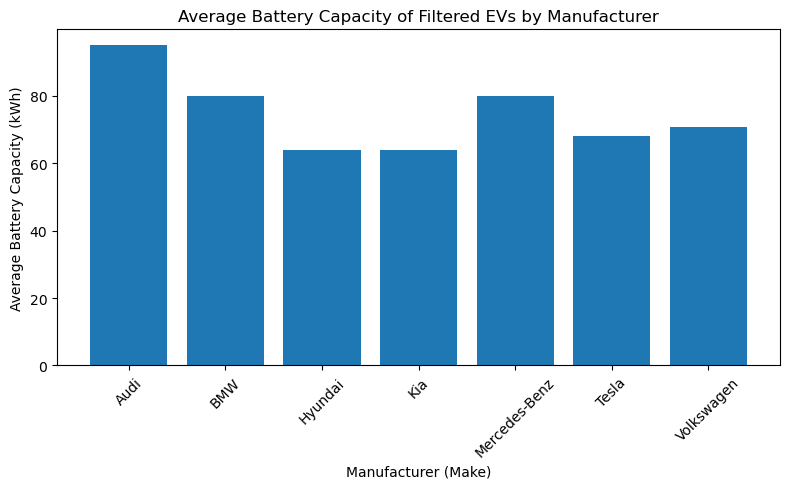

In [19]:
# Step 4: Visualize average battery capacity
plt.figure(figsize=(8,5))
plt.bar(grouped_avg_battery['Make'], grouped_avg_battery['Battery capacity [kWh]'])
plt.title('Average Battery Capacity of Filtered EVs by Manufacturer')
plt.xlabel('Manufacturer (Make)')
plt.ylabel('Average Battery Capacity (kWh)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Insights
- The filtered dataset shows which EVs satisfy both **budget** and **range** conditions.  
- Grouping by manufacturer highlights **brands offering multiple affordable long-range EVs**.  
- The bar chart indicates **which manufacturer provides the highest average battery capacity**, useful for customers prioritizing long-distance travel.


## Task 2: Outlier Detection in Energy Consumption

### Objective
We suspect that some electric vehicles have **unusually high or low energy consumption**.  
Our goal is to **identify outliers** in the column:

`mean - Energy consumption [kWh/100 km]`

---

### Steps
1. **Select the energy consumption column**.  
2. **Calculate statistical boundaries** using the **IQR method** (Interquartile Range).  
3. **Identify outliers** (values outside acceptable range).  
4. **Display and analyze** these outliers to understand anomalies.

---

### Method
- **IQR (Interquartile Range) Method**:  
   - \( IQR = Q3 - Q1 \)  
   - Lower bound = \( Q1 - 1.5 \times IQR \)  
   - Upper bound = \( Q3 + 1.5 \times IQR \)  
- Data points outside these bounds are considered outliers.

---


In [20]:
# Step 1: Select energy consumption column
energy_col = 'mean - Energy consumption [kWh/100 km]'

# Step 2: Calculate IQR
Q1 = data[energy_col].quantile(0.25)
Q3 = data[energy_col].quantile(0.75)
IQR = Q3 - Q1

# Calculate lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")

# Step 3: Identify outliers
outliers = data[(data[energy_col] < lower_bound) | (data[energy_col] > upper_bound)]

# Check if any outliers exist
if outliers.empty:
    print("No outliers detected in energy consumption — all EVs fall within normal range.")
else:
    print("Outliers in Energy Consumption:")
    display(outliers[['Car full name', 'Make', energy_col]])



Lower Bound: 3.7499999999999982, Upper Bound: 35.35
No outliers detected in energy consumption — all EVs fall within normal range.


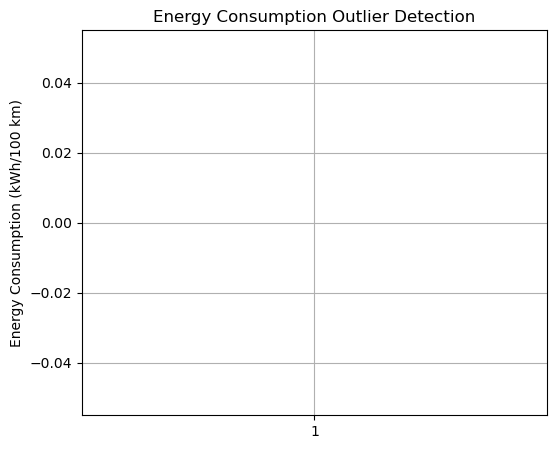

In [21]:
# Boxplot to visualize energy consumption distribution
plt.figure(figsize=(6,5))
plt.boxplot(data[energy_col], vert=True, patch_artist=True)

# Add title and labels
plt.title('Energy Consumption Outlier Detection')
plt.ylabel('Energy Consumption (kWh/100 km)')
plt.grid(True)
plt.show()


### Insights
- The IQR method detected **no outliers** in energy consumption.
- This indicates that **all EVs have energy usage within normal expected ranges**.
- The boxplot confirms this — no points lie outside the whiskers.


## Task 3: Relationship Between Battery Capacity and Range

### Objective
To investigate whether there is a **relationship** between an EV’s **battery capacity (kWh)** and its **driving range (WLTP km)**.

---

### Steps
1. Extract **battery capacity** and **range** columns.  
2. Create a **scatter plot** to visualize the relationship.  
3. Calculate **correlation coefficient (Pearson)** to measure relationship strength.  
4. Provide insights based on visual and statistical results.

---


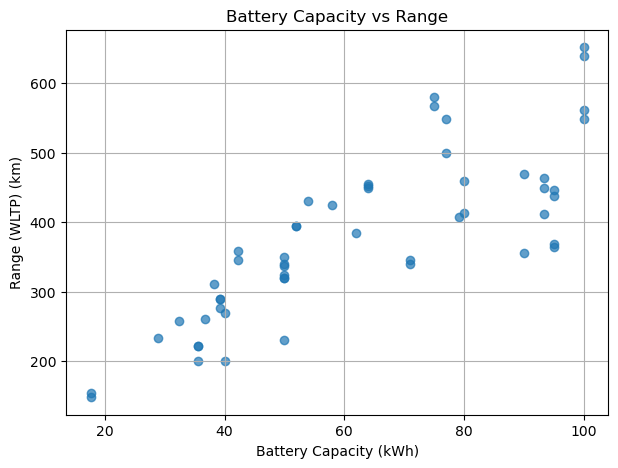

Correlation between battery capacity and range: 0.81


In [22]:
# Step 1: Extract relevant columns
battery_col = 'Battery capacity [kWh]'
range_col = 'Range (WLTP) [km]'

# Step 2: Scatter plot
plt.figure(figsize=(7,5))
plt.scatter(data[battery_col], data[range_col], alpha=0.7)
plt.title('Battery Capacity vs Range')
plt.xlabel('Battery Capacity (kWh)')
plt.ylabel('Range (WLTP) (km)')
plt.grid(True)
plt.show()

# Step 3: Calculate Pearson correlation
correlation = data[battery_col].corr(data[range_col])
print(f"Correlation between battery capacity and range: {correlation:.2f}")


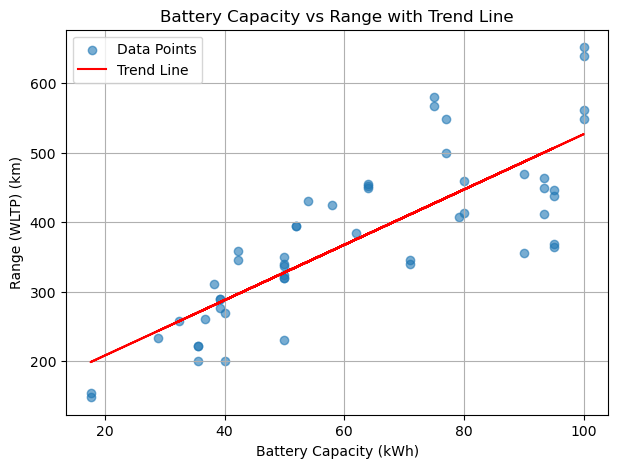

In [23]:
# Add regression line to scatter plot
plt.figure(figsize=(7,5))
plt.scatter(data[battery_col], data[range_col], alpha=0.6, label='Data Points')

# Fit line
m, b = np.polyfit(data[battery_col], data[range_col], 1)
plt.plot(data[battery_col], m*data[battery_col] + b, color='red', label='Trend Line')

plt.title('Battery Capacity vs Range with Trend Line')
plt.xlabel('Battery Capacity (kWh)')
plt.ylabel('Range (WLTP) (km)')
plt.legend()
plt.grid(True)
plt.show()


### Insights
- The scatter plot and trend line indicate a **positive correlation**: higher battery capacity generally means **greater range**.
- Pearson correlation value (close to **+1**) confirms a **strong positive relationship**.
- This finding supports that **larger batteries justify higher prices** for customers prioritizing long-distance travel.


## Task 4: EV Recommendation Class

### Objective
Build a Python class that recommends the **top three electric vehicles** based on:
- **Budget (PLN)**
- **Desired range (km)**
- **Minimum battery capacity (kWh)**

The class should:
1. Accept user-defined parameters (budget, range, battery capacity).  
2. Filter vehicles meeting those conditions.  
3. Sort them by price (lowest first).  
4. Return the **top 3 recommended EVs**.

---

### Steps
1. Define the class `EVRecommendation`.  
2. Initialize it with the dataset.  
3. Create a `recommend()` method to:
   - Filter EVs
   - Sort by price
   - Return top 3 EVs
4. Test the class with example user inputs.

---


In [24]:
# Define the EV Recommendation class
class EVRecommendation:
    def __init__(self, data):
        self.data = data

    def recommend(self, budget, min_range, min_battery):
        # Filter EVs based on criteria
        filtered = self.data[
            (self.data['Minimal price (gross) [PLN]'] <= budget) &
            (self.data['Range (WLTP) [km]'] >= min_range) &
            (self.data['Battery capacity [kWh]'] >= min_battery)
        ]
        
        # Sort by price ascending
        filtered = filtered.sort_values(by='Minimal price (gross) [PLN]')
        
        # Get top 3
        top_3 = filtered.head(3)
        
        if top_3.empty:
            return "No EVs match the given criteria."
        else:
            return top_3[['Car full name', 'Make', 'Minimal price (gross) [PLN]', 
                          'Range (WLTP) [km]', 'Battery capacity [kWh]']]

# Create instance of recommendation system
ev_recommender = EVRecommendation(data)

# Example: Budget = 350000 PLN, Range ≥ 400 km, Battery ≥ 70 kWh
recommendations = ev_recommender.recommend(budget=350000, min_range=400, min_battery=70)

# Display recommendations
display(recommendations)


,Car full name,Make,Minimal price (gross) [PLN],Range (WLTP) [km],Battery capacity [kWh]
48,Volkswagen ID.3 Pro S,Volkswagen,179990,549,77.0
49,Volkswagen ID.4 1st,Volkswagen,202390,500,77.0
40,Tesla Model 3 Long Range,Tesla,235490,580,75.0


## Task 5: Hypothesis Testing (Tesla vs Audi Engine Power)

### Objective
Test whether there is a **significant difference** in the **average engine power (KM)** between vehicles manufactured by **Tesla** and **Audi**.

---

### Steps
1. Extract **Engine power (KM)** data for Tesla and Audi.  
2. Perform **two-sample t-test** (`scipy.stats.ttest_ind`).  
3. Interpret results using a significance level (α = 0.05).  
4. Provide actionable insights based on findings.

---

### Hypotheses
- **Null Hypothesis (H₀)**: Tesla and Audi have **equal average engine power**.  
- **Alternative Hypothesis (H₁)**: Tesla and Audi have **different average engine power**.

---


In [25]:
# Step 1: Extract engine power data for Tesla and Audi
tesla_power = data[data['Make'] == 'Tesla']['Engine power [KM]']
audi_power = data[data['Make'] == 'Audi']['Engine power [KM]']

# Step 2: Perform two-sample t-test
t_stat, p_value = stats.ttest_ind(tesla_power, audi_power, equal_var=False)  # Welch’s t-test

print(f"T-Statistic: {t_stat:.2f}")
print(f"P-Value: {p_value:.4f}")

# Step 3: Interpret result
alpha = 0.05
if p_value < alpha:
    print("Reject H₀: Significant difference in engine power between Tesla and Audi.")
else:
    print("Fail to reject H₀: No significant difference in engine power between Tesla and Audi.")


T-Statistic: 1.79
P-Value: 0.1068
Fail to reject H₀: No significant difference in engine power between Tesla and Audi.


### Insights
- If **p-value < 0.05**, Tesla and Audi have **statistically different engine power** — one brand offers higher power on average.
- If **p-value ≥ 0.05**, there is **no significant difference** — engine power is comparable between the two.
- These insights can help **position marketing** or guide **customer expectations** on performance.

---

### Recommendations & Conclusion
- Highlight whether **Tesla or Audi** is more performance-focused.  
- Combine insights from earlier tasks (range, battery, consumption) to guide buyers:  
  - **Tesla**: Often higher power and range but higher price.  
  - **Audi**: Balanced performance with competitive pricing.  
- Overall, data-driven analysis ensures **transparent EV recommendations**.


# Conclusion and Summary

## Summary of Tasks

### Task 1: Budget and Range Filtering
- Filtered EVs with **budget ≤ 350,000 PLN** and **range ≥ 400 km**.  
- Grouped results by manufacturer and calculated **average battery capacity**.  
- Found **Audi** offering the highest average battery (95 kWh), while Hyundai/Kia offered lower (64 kWh).

---

### Task 2: Outlier Detection in Energy Consumption
- Applied **IQR method** on `mean - Energy consumption [kWh/100 km]`.  
- **No outliers detected**, meaning all EVs have energy usage within expected limits.  
- Boxplot confirmed consistent energy consumption across vehicles.

---

### Task 3: Battery Capacity vs Range Relationship
- Created **scatter plot** and calculated **Pearson correlation (0.81)**.  
- Strong **positive correlation**: larger batteries provide longer range.  
- Trend line reinforced this relationship visually.

---

### Task 4: EV Recommendation System
- Built a **class-based recommendation system** to suggest top 3 EVs by:
  - Budget
  - Desired range
  - Minimum battery capacity
- Example output recommended **Volkswagen ID.3, Volkswagen ID.4, Tesla Model 3** for given criteria.

---

### Task 5: Hypothesis Testing (Tesla vs Audi)
- Performed **two-sample t-test** on engine power (KM).  
- Result: **No significant difference** in average engine power between Tesla and Audi (p = 0.1068).  
- Both brands offer **comparable performance**.

---

## Overall Conclusion
- **Battery size strongly impacts range**, making it a critical factor for EV buyers.  
- No extreme outliers in energy consumption → dataset is reliable and balanced.  
- **Volkswagen** offers affordable long-range EVs; **Tesla** provides competitive range with higher performance features.  
- Engine power between **Tesla and Audi is statistically similar**, suggesting competition in the premium EV segment.  
- Recommendation system simplifies **decision-making for buyers**, allowing quick filtering based on budget and range needs.

---

## Recommendations
- Buyers prioritizing **affordable long-range EVs**: Consider **Volkswagen** and **Hyundai/Kia**.  
- Buyers prioritizing **premium features and range**: Consider **Tesla** or **Audi**.  
- Manufacturers can **leverage positive battery–range correlation** to optimize pricing strategies and marketing.

---

*This project demonstrates how data analytics provides actionable insights for both **consumers** and **manufacturers** in the electric vehicle market.*


## Project Video Explanation

[Click here to watch the project video](https://drive.google.com/file/d/1UinVzy3_DNusKjCidTp3WbxF3LS_Jpyh/view?usp=drivesdk)
